In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# setting seaborn style
%matplotlib inline
sns.set()

In [3]:
# loading traininga and testing set
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Data Cleaning and EDA

In [4]:
# checking the dataframes
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Survival rate

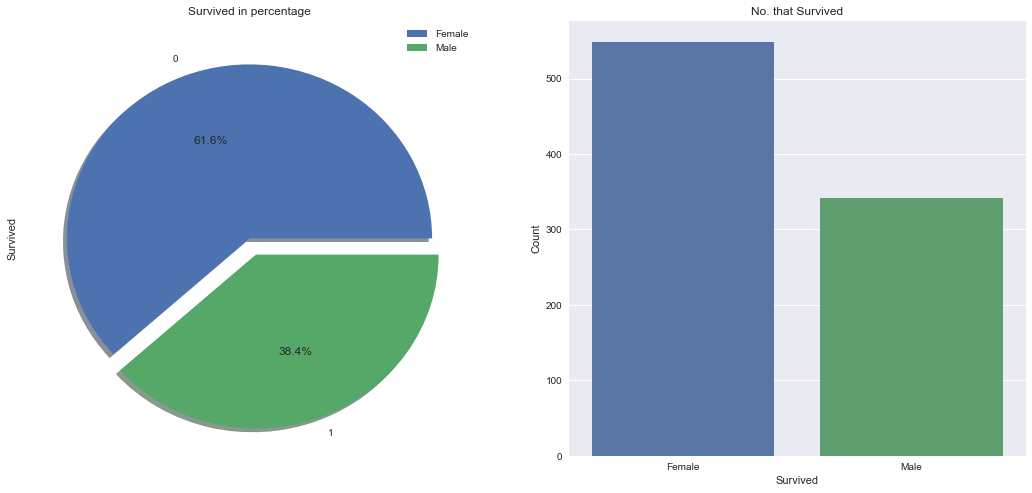

In [6]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
train_df.Survived.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('Survived in percentage')
label = ['Female','Male']
plt.legend(label)
plt.subplot(1,2,2)
sns.countplot(x='Survived',data=train_df)
plt.title('No. that Survived')
plt.xlabel('Survived')
plt.xticks(train_df.Survived,['Female','Male'])
plt.ylabel('Count')
plt.show()

### Majority didn't survive

## Checking for Missing values and Datatypes

In [7]:
# Missing values in age , cabin and embarked
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Missing values in age , fare and cabin
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
(((train_df.shape[0] - train_df.count(axis=0))/train_df.shape[0])*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

#### Note:
Around 77% of the cabin data is missing. So will drop the column.

In [10]:
train_df.drop(labels=['Cabin'],axis=1,inplace=True)
test_df.drop(labels=['Cabin'],axis=1,inplace=True)

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Note:
1. The oldest traveller was 80 yrs old. The data must be skewed because the 75 percentile is 38 yrs while max is 80 yrs.
2. The max fare is 512. The fare seems to be skewed also because the 75 percentile is 31 while max is 512.


## EDA

In [12]:
## Numerical columns
train_df._get_numeric_data().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
## Categorical columns
set(train_df.columns) - set(train_df._get_numeric_data().columns)

{'Embarked', 'Name', 'Sex', 'Ticket'}

### Sex

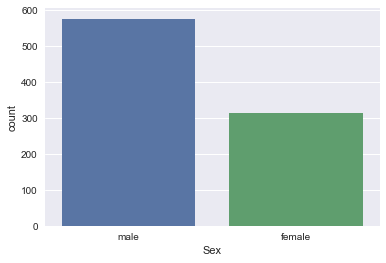

In [14]:
sns.countplot(train_df.Sex)

#### Note
1. Male passengers were more than Female

In [15]:
ct = pd.crosstab(index=train_df.Sex,columns=train_df.Survived,margins=True)
ct

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [16]:
#train_df[train_df.Sex == 'female'].Survived.sum()/train_df[train_df.Sex=='female'].Survived.count()
train_df['Did Not Survive'] = 1 - train_df['Survived']

In [17]:
## Did not Survive
print('Did not Survive:',(ct[0] * 100/ct[0:2][0].sum(axis=0)))

## Survive
print('Survived:',(ct[1] * 100/ct[0:2][1].sum(axis=0)))

Did not Survive: Sex
female     14.754098
male       85.245902
All       100.000000
Name: 0, dtype: float64
Survived: Sex
female     68.128655
male       31.871345
All       100.000000
Name: 1, dtype: float64


In [18]:
## Did not Survive
print('Did not Survive:',(ct[0] * 100/ct['All']))

## Survive
print('Survived:',(ct[1] * 100/ct['All']))

Did not Survive: Sex
female    25.796178
male      81.109185
All       61.616162
dtype: float64
Survived: Sex
female    74.203822
male      18.890815
All       38.383838
dtype: float64


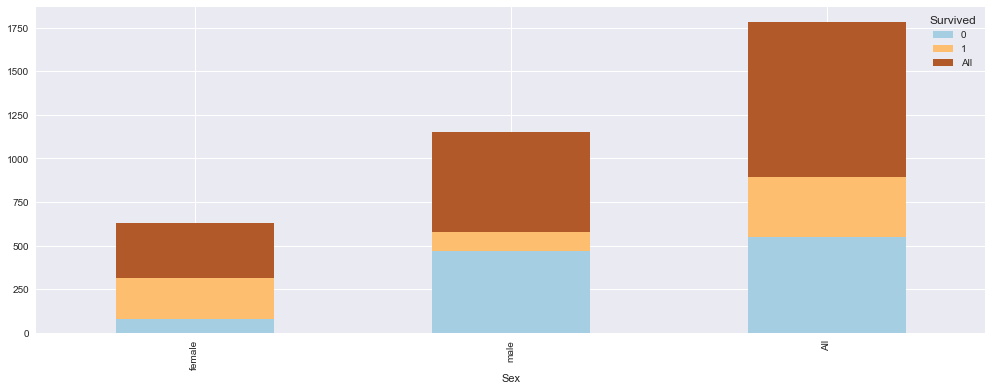

<Figure size 1224x432 with 0 Axes>

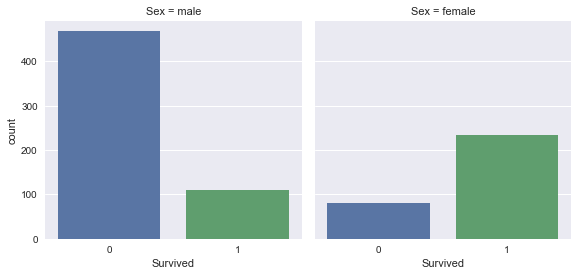

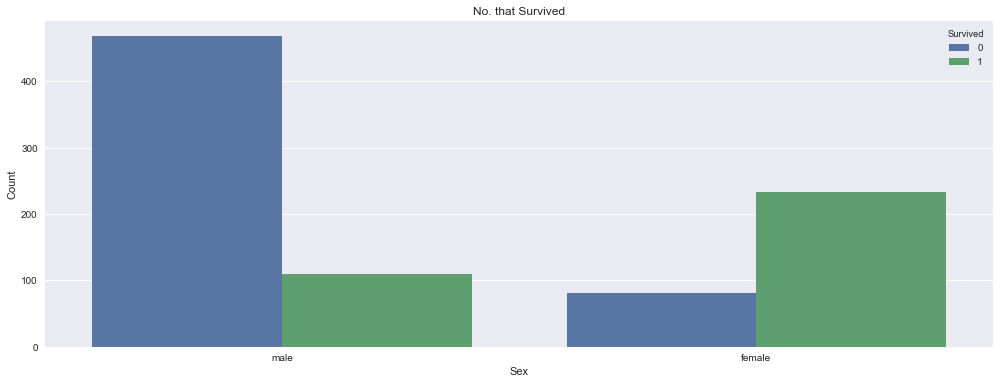

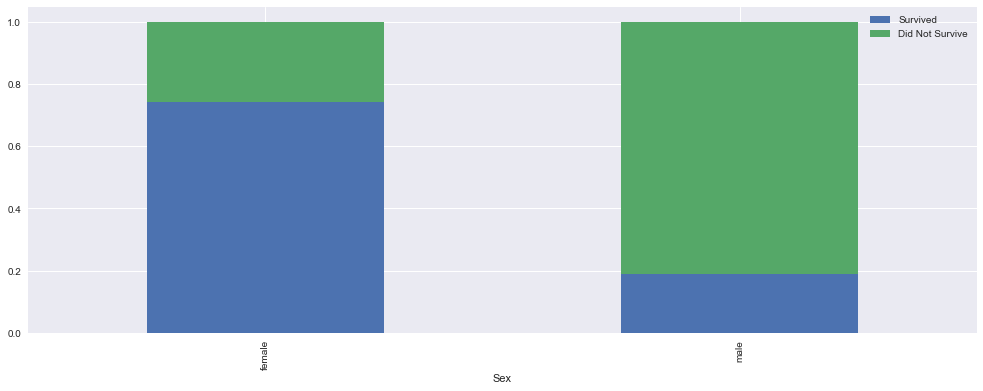

In [19]:
ct.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')
plt.show()

plt.figure(figsize=(17,6))
sns.factorplot(x='Survived', col='Sex', kind='count', data=train_df)
plt.show()

plt.figure(figsize=(17,6))
sns.countplot(train_df.Sex,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Sex').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(17,6), 
                                                           stacked=True);
plt.show()

#### Note
1. Around 74.2% of Women survived and 18.89% of men survived. This shows that more Female survived than Men. 

## Pclass

In [20]:
ct1 = pd.crosstab(index=train_df.Pclass,columns=train_df.Survived,margins=True)
ct1

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
## Did not Survive
print('Did not Survive:',(ct1[0] * 100/ct1[0:3][0].sum(axis=0)))

## Survive
print('Survived:',(ct1[1] * 100/ct1[0:3][1].sum(axis=0)))

Did not Survive: Pclass
1       14.571949
2       17.668488
3       67.759563
All    100.000000
Name: 0, dtype: float64
Survived: Pclass
1       39.766082
2       25.438596
3       34.795322
All    100.000000
Name: 1, dtype: float64


In [22]:
## Did not Survive
print('Did not Survive:',(ct1[0] * 100/ct1['All']))

## Survive
print('Survived:',(ct1[1] * 100/ct1['All']))

Did not Survive: Pclass
1      37.037037
2      52.717391
3      75.763747
All    61.616162
dtype: float64
Survived: Pclass
1      62.962963
2      47.282609
3      24.236253
All    38.383838
dtype: float64


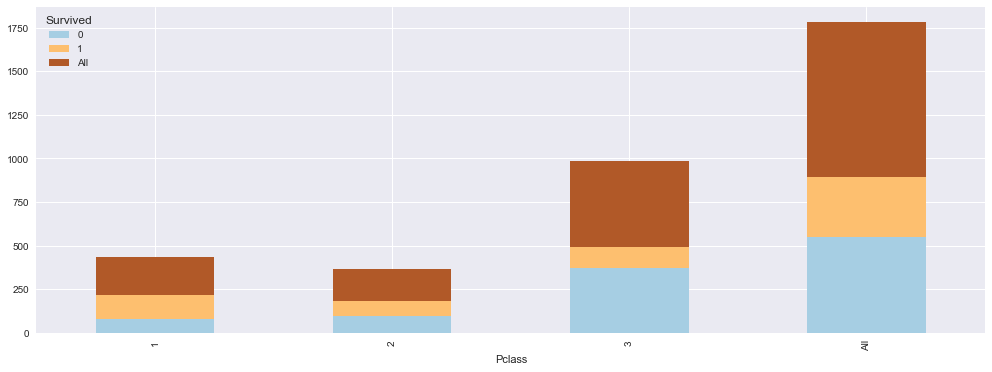

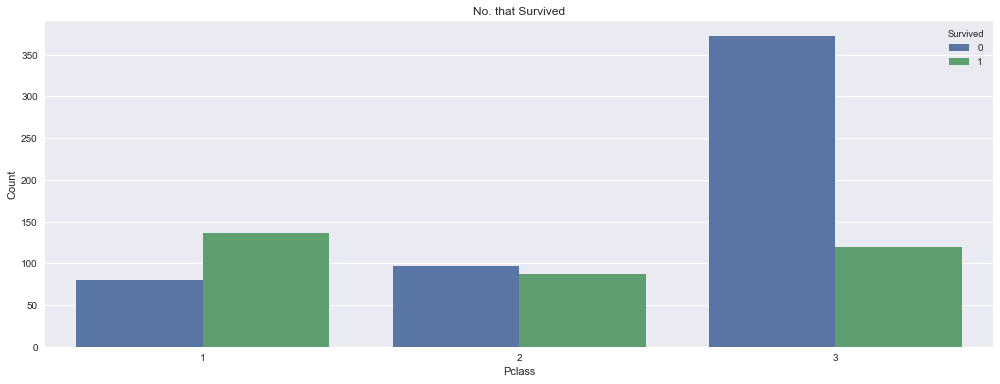

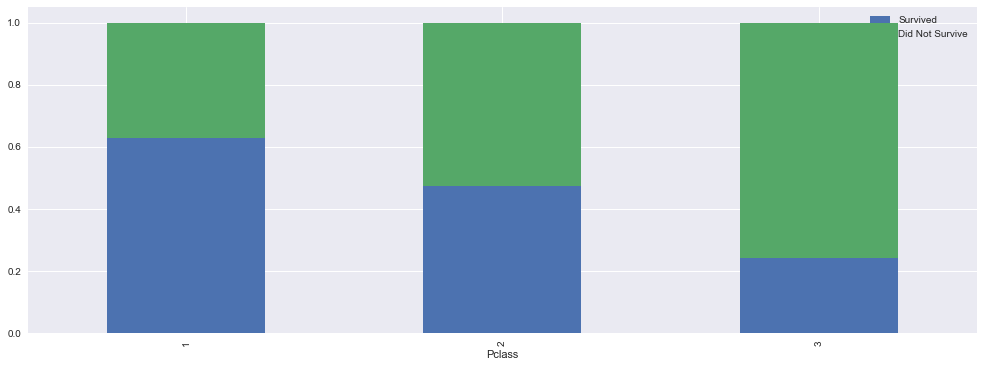

In [23]:
ct1.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')
plt.show()

plt.figure(figsize=(17,6))
sns.countplot(train_df.Pclass,hue=train_df.Survived)
plt.title('No. that Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

train_df.groupby('Pclass').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(17, 6), 
                                                           stacked=True);
plt.show()

#### Note:
1. More passengers of class 3 did not survive compared to the other 2 classes though the passengers in class 3 were more than twice of class 1 and class 2.
2. But the survival rate of class 1 is 62.96% more than that of class 2 and class 3 which are 47.28% and 24.23%
3. So passengers of the higher classes were likely to survive compared to the lower ones.

### Pclass and Sex

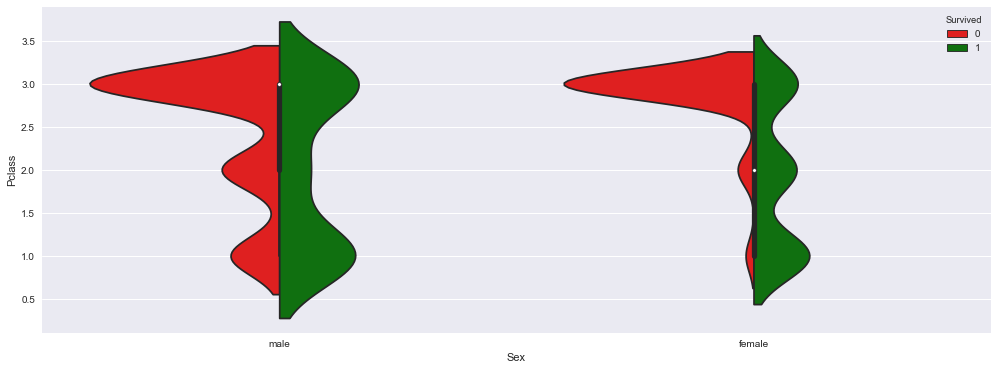

In [24]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.Sex,y=train_df.Pclass,hue=train_df.Survived,split=True,palette={0: "r", 1: "g"})
plt.show()

In [25]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

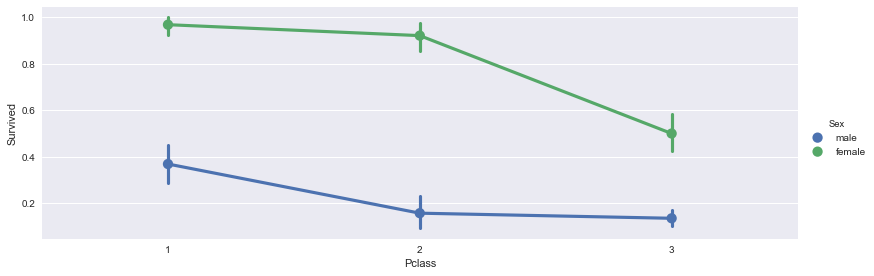

In [26]:

sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train_df,aspect = (17/6))
plt.show()

#### Note
1. It can be clearly seen that more male and female passengers from class 3 didn't survive
2. Amongst females more from class 1 and class 2 survived compared to the class 3

### Embarked

In [27]:
ct2 = pd.crosstab(index=train_df.Embarked,columns=train_df.Survived,margins=True)
ct2

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [28]:
## Did not Survive
print('Did not Survive:',(ct2[0] * 100/ct2[0:3][0].sum(axis=0)))

## Survive
print('Survived:',(ct2[1] * 100/ct2[0:3][1].sum(axis=0)))

Did not Survive: Embarked
C       13.661202
Q        8.561020
S       77.777778
All    100.000000
Name: 0, dtype: float64
Survived: Embarked
C       27.352941
Q        8.823529
S       63.823529
All    100.000000
Name: 1, dtype: float64


In [29]:
## Did not Survive
print('Did not Survive:',(ct2[0] * 100/ct2['All']))

## Survive
print('Survived:',(ct2[1] * 100/ct2['All']))

Did not Survive: Embarked
C      44.642857
Q      61.038961
S      66.304348
All    61.754781
dtype: float64
Survived: Embarked
C      55.357143
Q      38.961039
S      33.695652
All    38.245219
dtype: float64


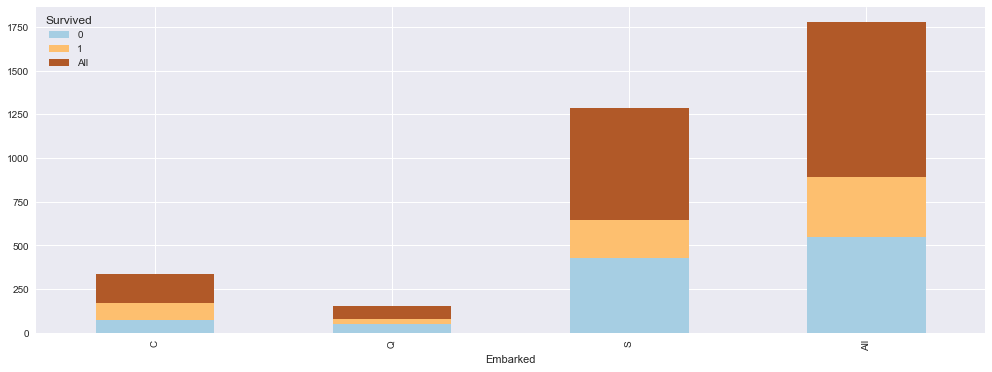

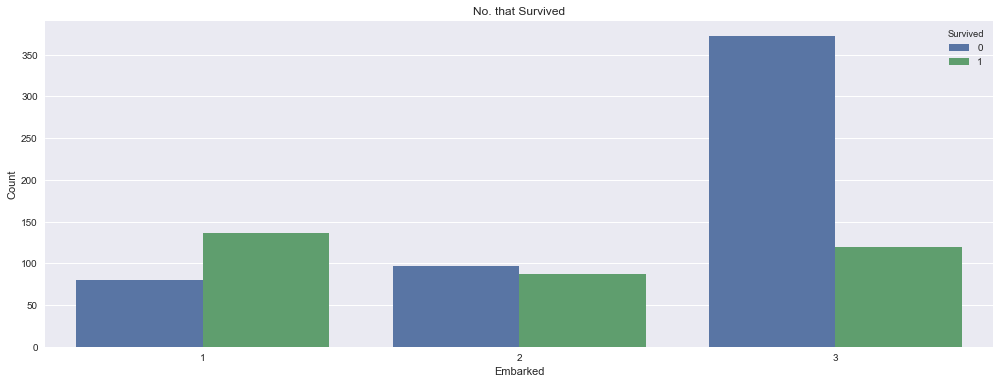

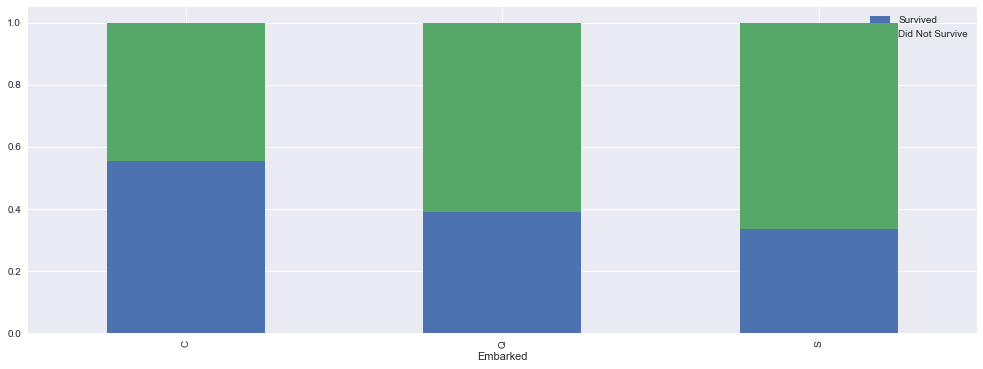

In [30]:
ct2.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')
plt.show()

plt.figure(figsize=(17,6))
sns.countplot(train_df.Pclass,hue=train_df.Survived)
plt.title('No. that Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

train_df.groupby('Embarked').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(17,6), 
                                                           stacked=True);
plt.show()

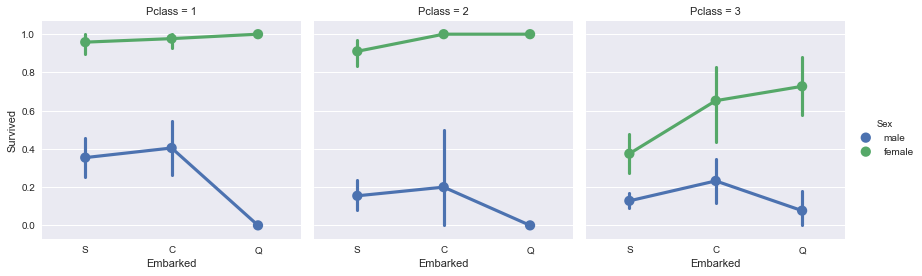

In [31]:
sns.factorplot(x='Embarked',y='Survived',hue='Sex',col ='Pclass', data=train_df)
plt.show()

#### Note
1. More passengers from S and Q did not survive
2. The survival rate of women who embarked from C and Q were likely to survive compared to S whereas among men the ones who embarked from S and C were likely to survive compared to Q from all 3 classes
3. More women from the higher classes survived class 1 > class 2 > class 3. However such a trend is not seen in the male category

## Fare

C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


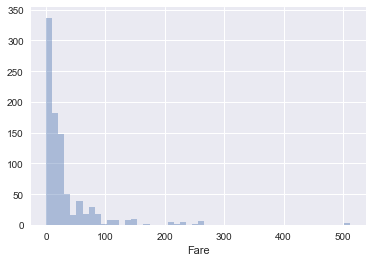

In [32]:
sns.distplot(train_df.Fare, kde=False)

#### Note: 
1. Most passengers paid less than 100 for travelling with the Titanic.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

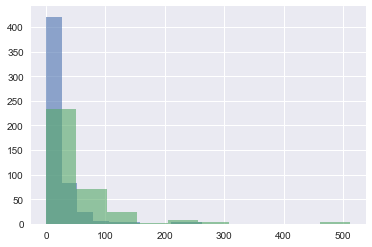

In [33]:
train_df.groupby('Survived').Fare.hist(alpha=0.6)

C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SHERILYN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


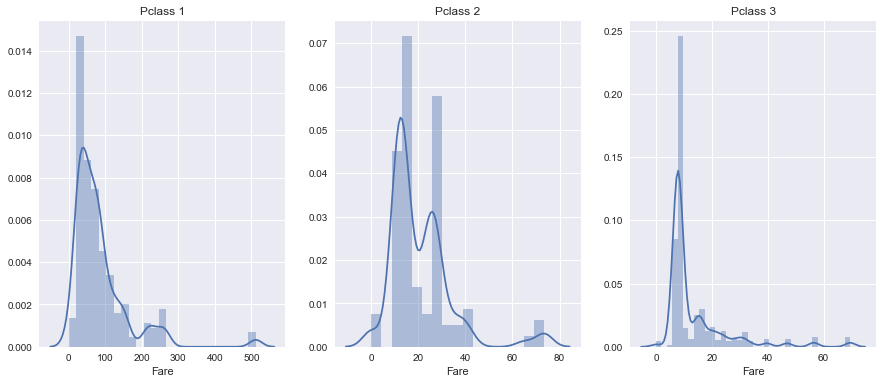

In [34]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.distplot(train_df[train_df.Pclass==1].Fare, ax=ax[0])
ax[0].set_title('Pclass 1')
sns.distplot(train_df[train_df.Pclass==2].Fare, ax=ax[1])
ax[1].set_title('Pclass 2')
sns.distplot(train_df[train_df.Pclass==3].Fare, ax=ax[2])
ax[2].set_title('Pclass 3')
plt.show()

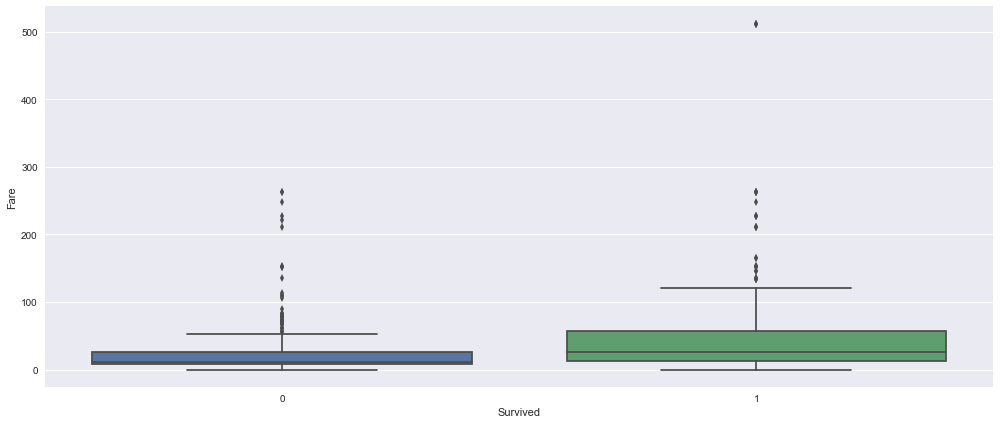

In [35]:
plt.figure(figsize=(17,7))
sns.boxplot(y = train_df.Fare,x=train_df.Survived)
plt.show()

#### Note
1. Looks like Higher Fare passengers survived

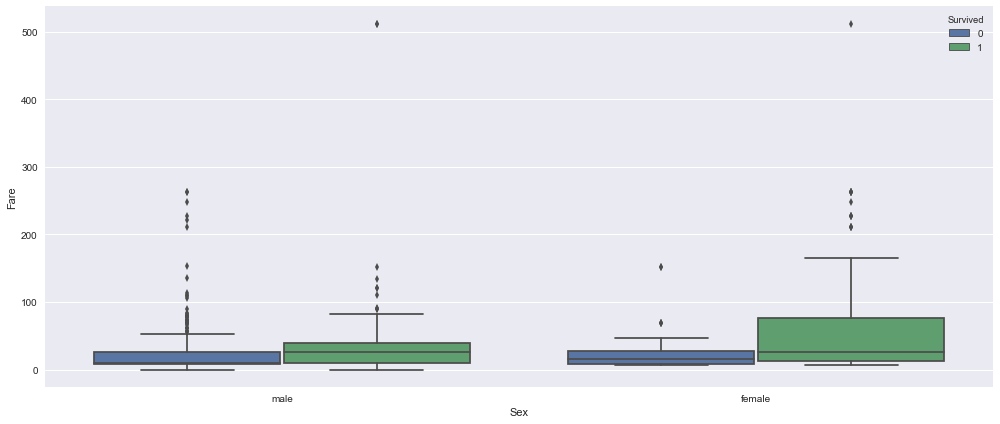

In [36]:
plt.figure(figsize=(17,7))
sns.boxplot(y = train_df.Fare,x=train_df.Sex,hue=train_df.Survived)
plt.show()

#### Note:
1. Looks like Higher Fare Female Passengers most likely survived 

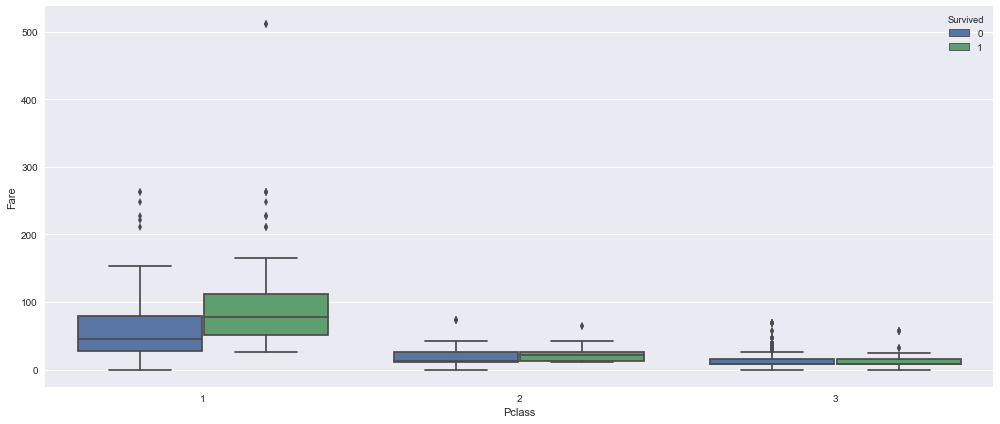

In [37]:
plt.figure(figsize=(17,7))
sns.boxplot(y = train_df.Fare,x=train_df.Pclass,hue=train_df.Survived)
plt.show()

#### Note:
1. Looks like Higher Fare First Class Passengers most likely survived 

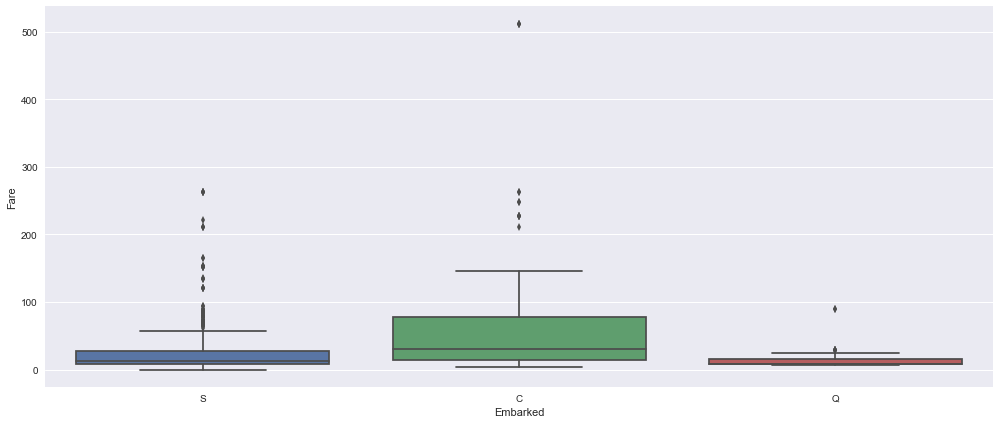

In [38]:
plt.figure(figsize=(17,7))
sns.boxplot(y = train_df.Fare,x=train_df.Embarked)
plt.show()

#### Note
1. Looks like Fares of C were higher than S and Q

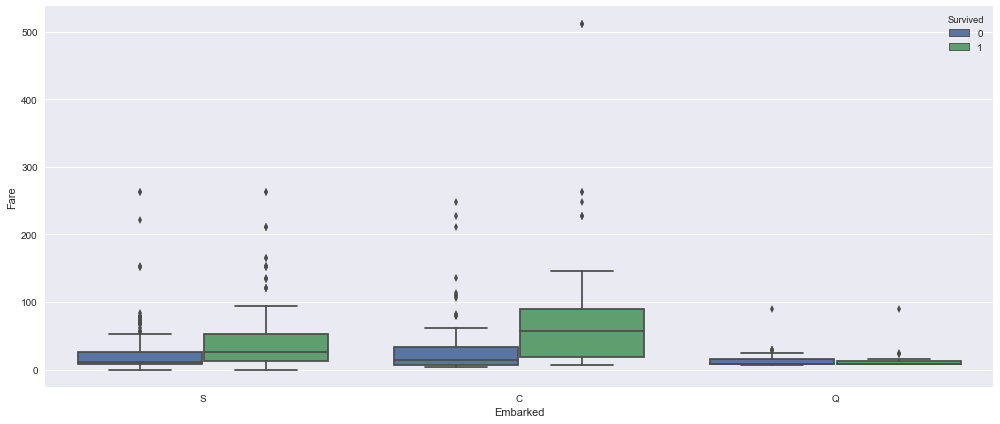

In [39]:
plt.figure(figsize=(17,7))
sns.boxplot(y = train_df.Fare,x=train_df.Embarked,hue=train_df.Survived)
plt.show()

#### Note
1. Previously it was seen that C had higher Fares. Here it can be seen that the higher fare passengers from S and C survived.

## Sibsp

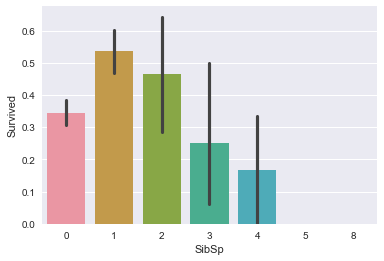

In [40]:
sns.barplot('SibSp','Survived',data=train_df)
plt.show()

In [41]:
ct3 = pd.crosstab(train_df.SibSp, train_df.Survived,margins=True)
ct3

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [42]:
## Did not Survive
print('Did not Survive:',(ct3[0] * 100/ct3[0:7][0].sum(axis=0)))

## Survive
print('Survived:',(ct3[1] * 100/ct3[0:7][1].sum(axis=0)))

Did not Survive: SibSp
0       72.495446
1       17.668488
2        2.732240
3        2.185792
4        2.732240
5        0.910747
8        1.275046
All    100.000000
Name: 0, dtype: float64
Survived: SibSp
0       61.403509
1       32.748538
2        3.801170
3        1.169591
4        0.877193
5        0.000000
8        0.000000
All    100.000000
Name: 1, dtype: float64


In [43]:
## Did not Survive
print('Did not Survive:',(ct3[0] * 100/ct3['All']))

## Survive
print('Survived:',(ct3[1] * 100/ct3['All']))

Did not Survive: SibSp
0       65.460526
1       46.411483
2       53.571429
3       75.000000
4       83.333333
5      100.000000
8      100.000000
All     61.616162
dtype: float64
Survived: SibSp
0      34.539474
1      53.588517
2      46.428571
3      25.000000
4      16.666667
5       0.000000
8       0.000000
All    38.383838
dtype: float64


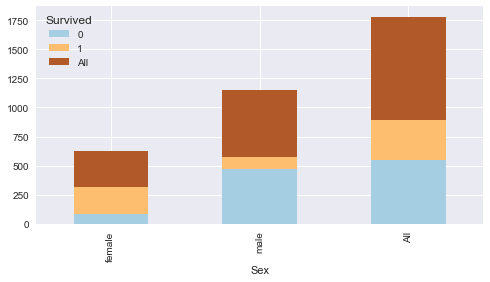

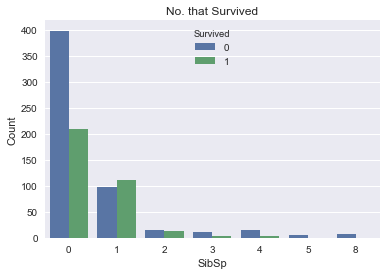

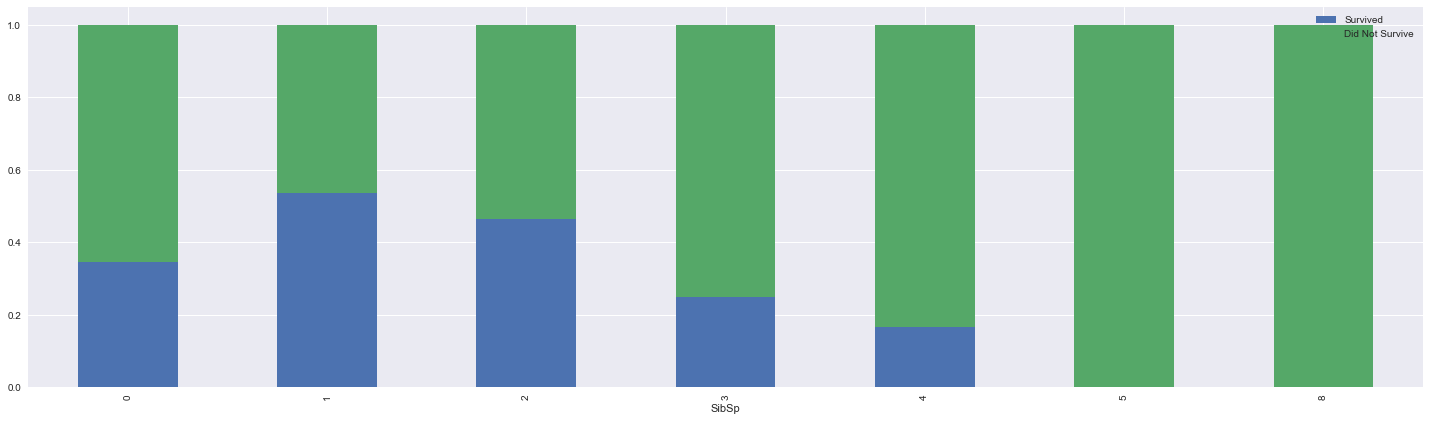

In [44]:
ct.plot(kind="bar", figsize=(8,4), stacked=True, colormap='Paired')
plt.show()


sns.countplot(train_df.SibSp,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('SibSp').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

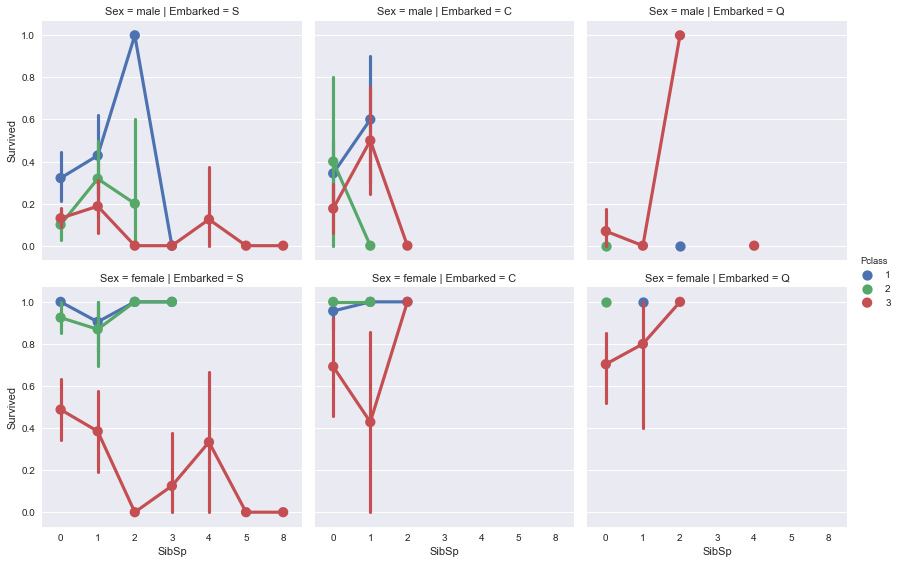

In [45]:
sns.factorplot(x='SibSp',y='Survived',hue='Pclass',col ='Embarked',row='Sex', data=train_df)
plt.show()

#### Note:
1. The chance of survival decreased with the increase in the no.of siblings.
2. On further analysis it is seen that irrespective of the number siblings:
  - Females had a better chance of survival than males 
  - Class 3 was always at a disadvantage for males and females


## Parch

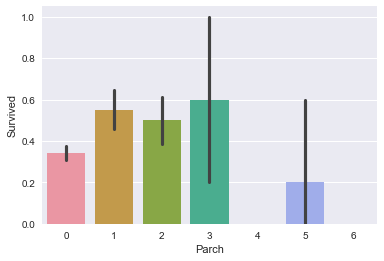

In [46]:
sns.barplot('Parch','Survived',data=train_df)
plt.show()

In [47]:
ct4 = pd.crosstab(train_df.Parch, train_df.Survived,margins=True)
ct4

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [48]:
## Did not Survive
print('Did not Survive:',(ct4[0] * 100/ct4[0:7][0].sum(axis=0)))

## Survive
print('Survived:',(ct4[1] * 100/ct4[0:7][1].sum(axis=0)))

Did not Survive: Parch
0       81.056466
1        9.653916
2        7.285974
3        0.364299
4        0.728597
5        0.728597
6        0.182149
All    100.000000
Name: 0, dtype: float64
Survived: Parch
0       68.128655
1       19.005848
2       11.695906
3        0.877193
4        0.000000
5        0.292398
6        0.000000
All    100.000000
Name: 1, dtype: float64


In [49]:
## Did not Survive
print('Did not Survive:',(ct4[0] * 100/ct4['All']))

## Survive
print('Survived:',(ct4[1] * 100/ct4['All']))

Did not Survive: Parch
0       65.634218
1       44.915254
2       50.000000
3       40.000000
4      100.000000
5       80.000000
6      100.000000
All     61.616162
dtype: float64
Survived: Parch
0      34.365782
1      55.084746
2      50.000000
3      60.000000
4       0.000000
5      20.000000
6       0.000000
All    38.383838
dtype: float64


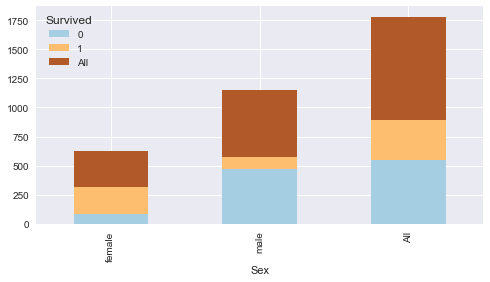

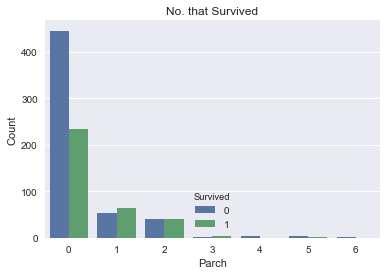

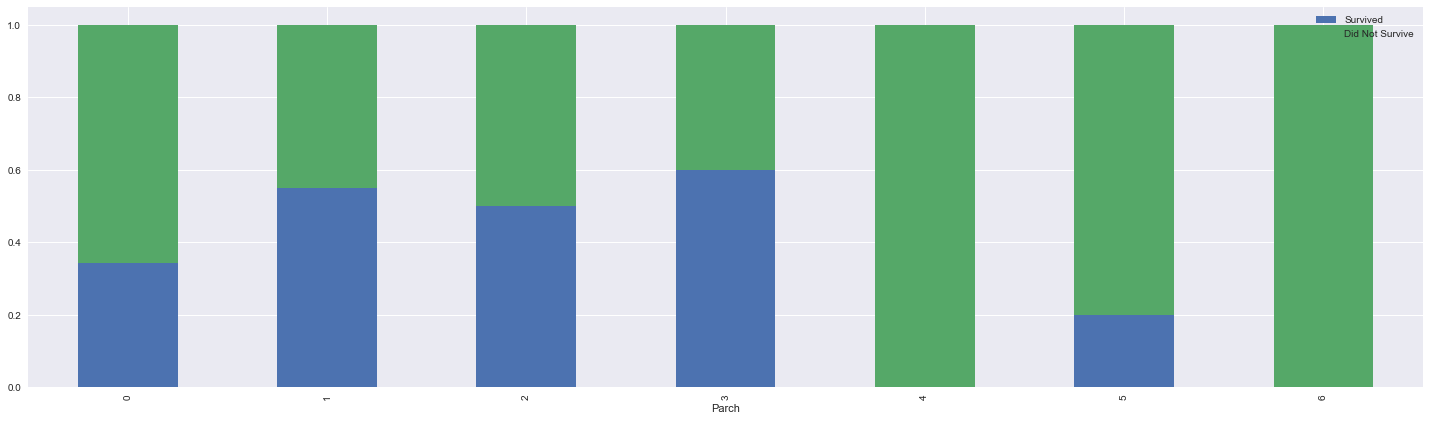

In [50]:
ct.plot(kind="bar", figsize=(8,4), stacked=True, colormap='Paired')
plt.show()


sns.countplot(train_df.Parch,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Parch').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

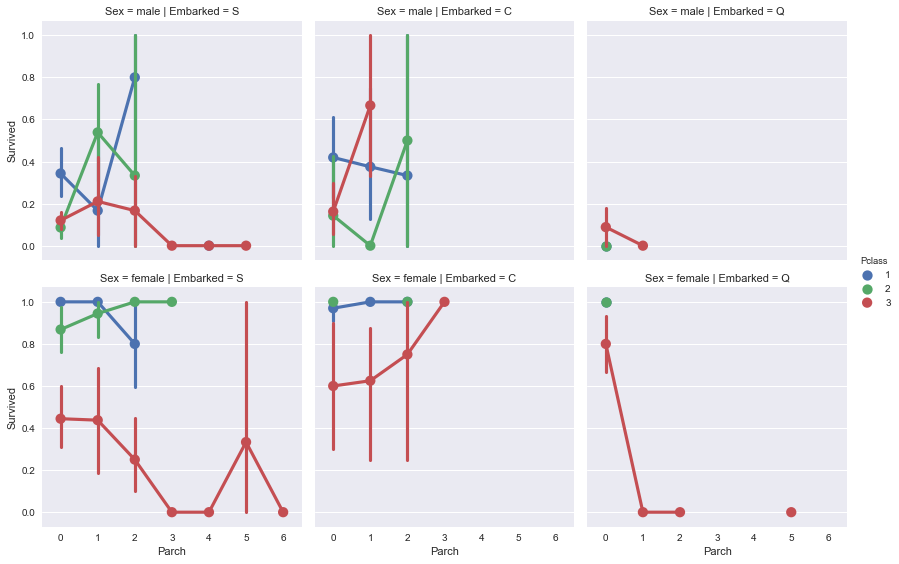

In [51]:
sns.factorplot(x='Parch',y='Survived',hue='Pclass',col ='Embarked',row='Sex', data=train_df)
plt.show()

#### Note:
1. Passengers with their parents onboard have greater chance of survival but when Parch > 4 it reduces.
2. Being alone was disadvantageous also
3. The chances of survival is good for somebody who has 1-3 parch on the ship

## Ticket

In [52]:
train_df['Ticket'] = train_df.Ticket.str.replace('.','').str.replace('/','').str.split()
test_df['Ticket'] = test_df.Ticket.str.replace('.','').str.replace('/','').str.split()

def ticket_type(ticket):
    
    if len(ticket) > 1 :
        return ticket[0]
    else:
        return 'Other'
    
train_df['Ticket'] = train_df['Ticket'].apply(ticket_type)
test_df['Ticket'] = test_df['Ticket'].apply(ticket_type)

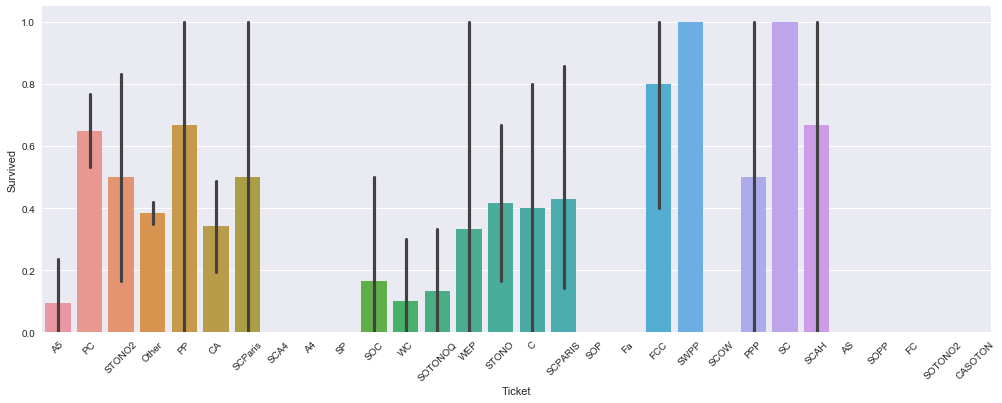

In [53]:
plt.figure(figsize=(17,6))
sns.barplot('Ticket','Survived',data=train_df)
plt.xticks(rotation=45)
plt.show()

In [54]:
ct7 = pd.crosstab(train_df.Ticket, train_df.Survived,margins=True)
ct7

Survived,0,1,All
Ticket,,,
A4,7,0,7
A5,19,2,21
AS,1,0,1
C,3,2,5
CA,27,14,41
CASOTON,1,0,1
FC,1,0,1
FCC,1,4,5
Fa,1,0,1


In [55]:
## Did not Survive
print('Did not Survive:',(ct7[0] * 100/ct7[0:30][0].sum(axis=0)))

## Survive
print('Survived:',(ct7[1] * 100/ct7[0:30][1].sum(axis=0)))

Did not Survive: Ticket
A4           1.275046
A5           3.460838
AS           0.182149
C            0.546448
CA           4.918033
CASOTON      0.182149
FC           0.182149
FCC          0.182149
Fa           0.182149
Other       74.681239
PC           3.825137
PP           0.182149
PPP          0.182149
SC           0.000000
SCA4         0.182149
SCAH         0.182149
SCOW         0.182149
SCPARIS      0.728597
SCParis      0.364299
SOC          0.910747
SOP          0.182149
SOPP         0.546448
SOTONO2      0.364299
SOTONOQ      2.367942
SP           0.182149
STONO        1.275046
STONO2       0.546448
SWPP         0.000000
WC           1.639344
WEP          0.364299
All        100.000000
Name: 0, dtype: float64
Survived: Ticket
A4           0.000000
A5           0.584795
AS           0.000000
C            0.584795
CA           4.093567
CASOTON      0.000000
FC           0.000000
FCC          1.169591
Fa           0.000000
Other       74.561404
PC          11.403509
PP         

In [56]:
## Did not Survive
print('Did not Survive:',(ct7[0] * 100/ct7['All']))

## Survive
print('Survived:',(ct7[1] * 100/ct7['All']))

Did not Survive: Ticket
A4         100.000000
A5          90.476190
AS         100.000000
C           60.000000
CA          65.853659
CASOTON    100.000000
FC         100.000000
FCC         20.000000
Fa         100.000000
Other       61.654135
PC          35.000000
PP          33.333333
PPP         50.000000
SC           0.000000
SCA4       100.000000
SCAH        33.333333
SCOW       100.000000
SCPARIS     57.142857
SCParis     50.000000
SOC         83.333333
SOP        100.000000
SOPP       100.000000
SOTONO2    100.000000
SOTONOQ     86.666667
SP         100.000000
STONO       58.333333
STONO2      50.000000
SWPP         0.000000
WC          90.000000
WEP         66.666667
All         61.616162
dtype: float64
Survived: Ticket
A4           0.000000
A5           9.523810
AS           0.000000
C           40.000000
CA          34.146341
CASOTON      0.000000
FC           0.000000
FCC         80.000000
Fa           0.000000
Other       38.345865
PC          65.000000
PP          66.66666

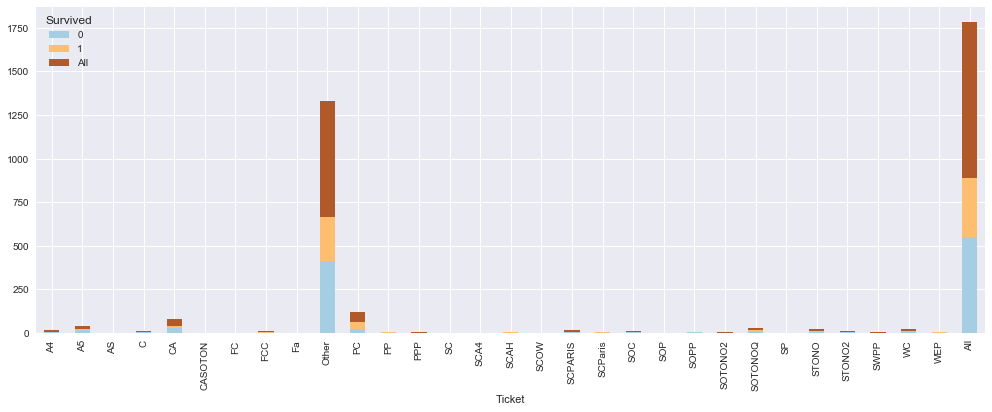

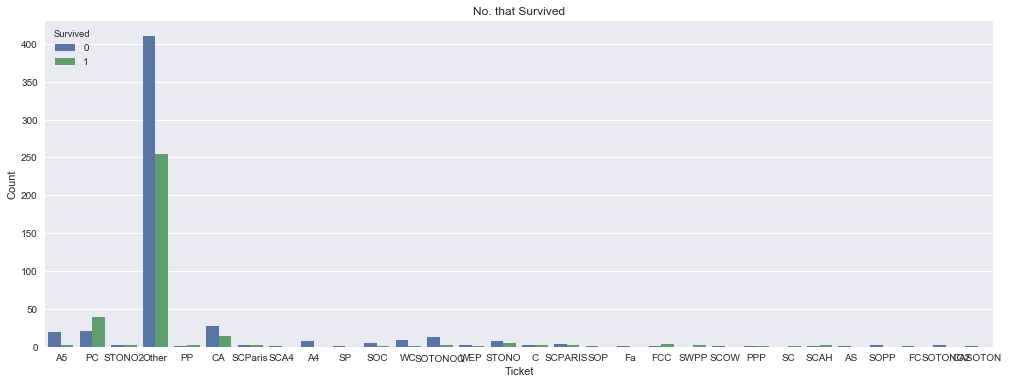

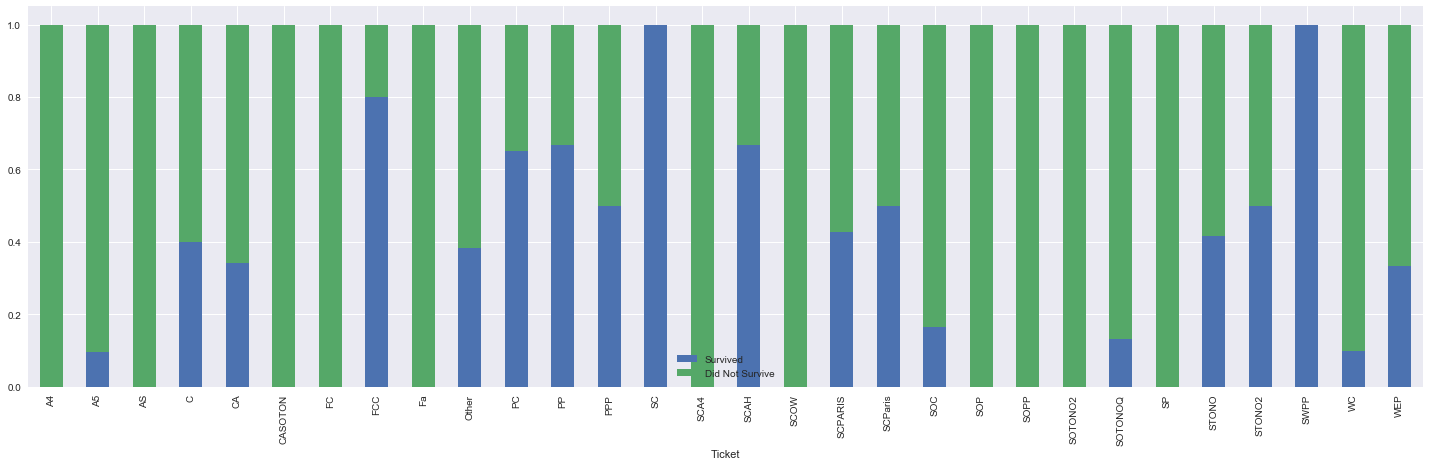

In [57]:
ct7.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')
plt.show()

plt.figure(figsize=(17,6))
sns.countplot(train_df.Ticket,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Ticket').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

# Feature engineering

## Family size

In [58]:
train_df['FamilySize'] =train_df['Parch'] + train_df['SibSp'] + 1
test_df['FamilySize'] =test_df['Parch'] + test_df['SibSp'] + 1

In [59]:
train_df.FamilySize.value_counts().to_frame().style.background_gradient(cmap='summer')

,FamilySize
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


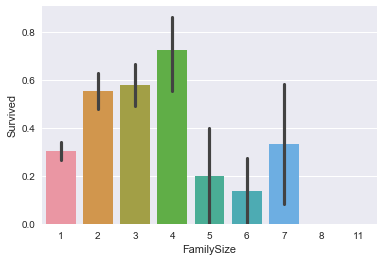

In [60]:
sns.barplot('FamilySize','Survived',data=train_df)
plt.show()

In [61]:
ct5 = pd.crosstab(train_df.FamilySize, train_df.Survived,margins=True)
ct5

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


In [62]:
## Did not Survive
print('Did not Survive:',(ct5[0] * 100/ct5[0:9][0].sum(axis=0)))

## Survive
print('Survived:',(ct5[1] * 100/ct5[0:7][1].sum(axis=0)))

Did not Survive: FamilySize
1       68.123862
2       13.114754
3        7.832423
4        1.457195
5        2.185792
6        3.460838
7        1.457195
8        1.092896
11       1.275046
All    100.000000
Name: 0, dtype: float64
Survived: FamilySize
1       47.660819
2       26.023392
3       17.251462
4        6.140351
5        0.877193
6        0.877193
7        1.169591
8        0.000000
11       0.000000
All    100.000000
Name: 1, dtype: float64


In [63]:
## Did not Survive
print('Did not Survive:',(ct5[0] * 100/ct5['All']))

## Survive
print('Survived:',(ct5[1] * 100/ct5['All']))

Did not Survive: FamilySize
1       69.646182
2       44.720497
3       42.156863
4       27.586207
5       80.000000
6       86.363636
7       66.666667
8      100.000000
11     100.000000
All     61.616162
dtype: float64
Survived: FamilySize
1      30.353818
2      55.279503
3      57.843137
4      72.413793
5      20.000000
6      13.636364
7      33.333333
8       0.000000
11      0.000000
All    38.383838
dtype: float64


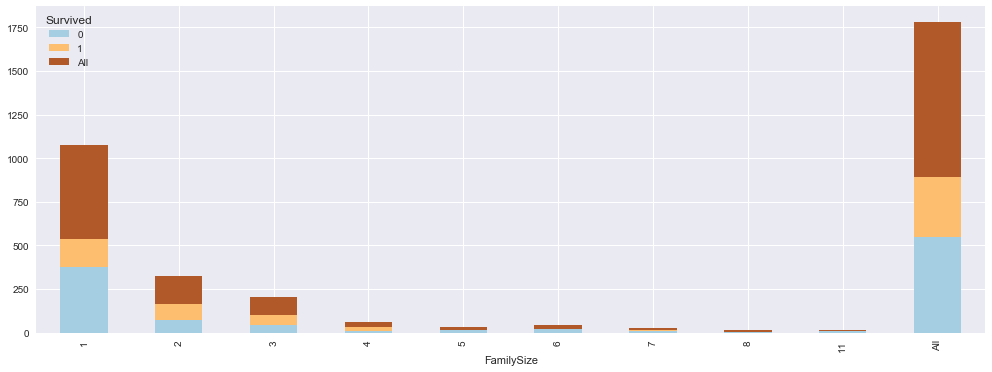

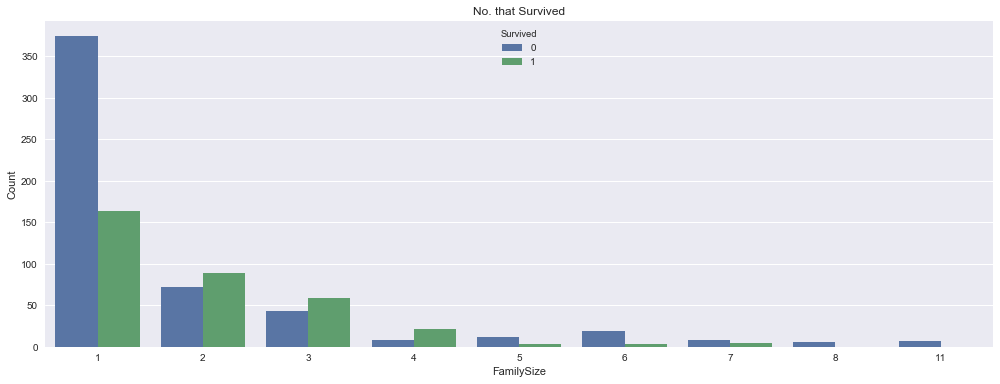

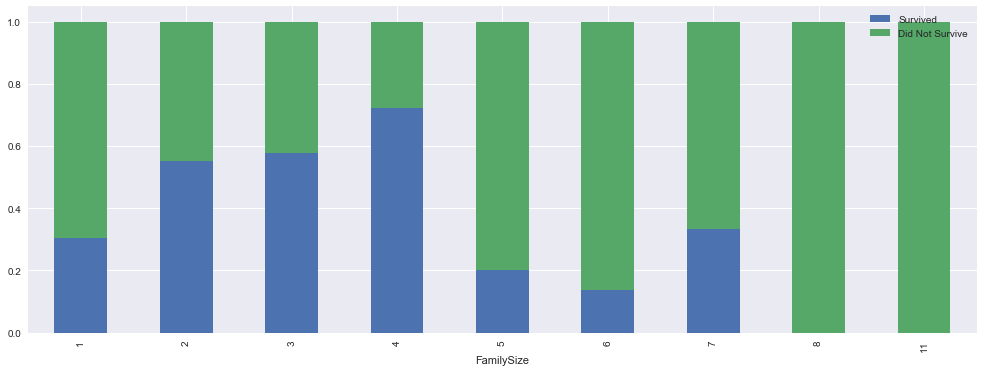

In [64]:
ct5.plot(kind="bar", figsize=(17,6), stacked=True, colormap='Paired')
plt.show()

plt.figure(figsize=(17,6))
sns.countplot(train_df.FamilySize,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('FamilySize').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(17,6), 
                                                           stacked=True);
plt.show()

In [65]:
pd.crosstab([train_df.FamilySize,train_df.Survived],train_df.Pclass)


Pclass                1   2    3
FamilySize Survived             
1          0         51  68  255
           1         58  36   69
2          0         19  16   37
           1         51  18   20
3          0          6  10   27
           1         18  21   20
4          0          2   3    3
           1          5  10    6
5          0          0   0   12
           1          2   1    0
6          0          2   0   17
           1          2   1    0
7          0          0   0    8
           1          0   0    4
8          0          0   0    6
11         0          0   0    7

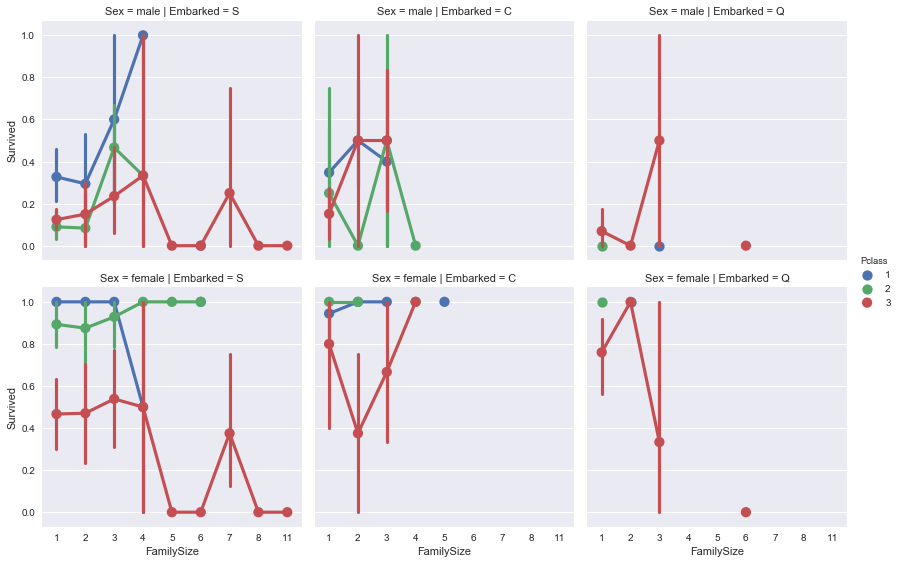

In [66]:
sns.factorplot(x='FamilySize',y='Survived',hue='Pclass',col ='Embarked',row='Sex', data=train_df)
plt.show()

#### Note
1. Chances of survival on travelling alone were less.
2. Also very large families didn't survive.


## Title

In [67]:
train_df['Title'] = train_df.Name.str.extract(' ([a-zA-Z]*)\.',expand=True)
test_df['Title'] = test_df.Name.str.extract(' ([a-zA-Z]*)\.',expand=True)

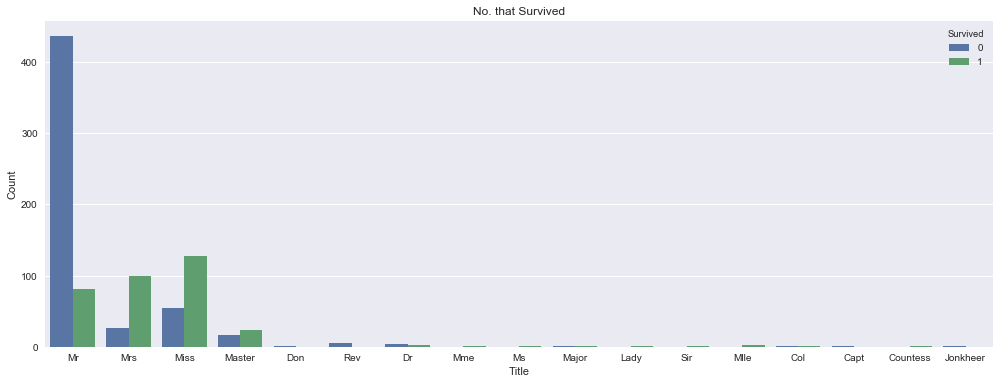

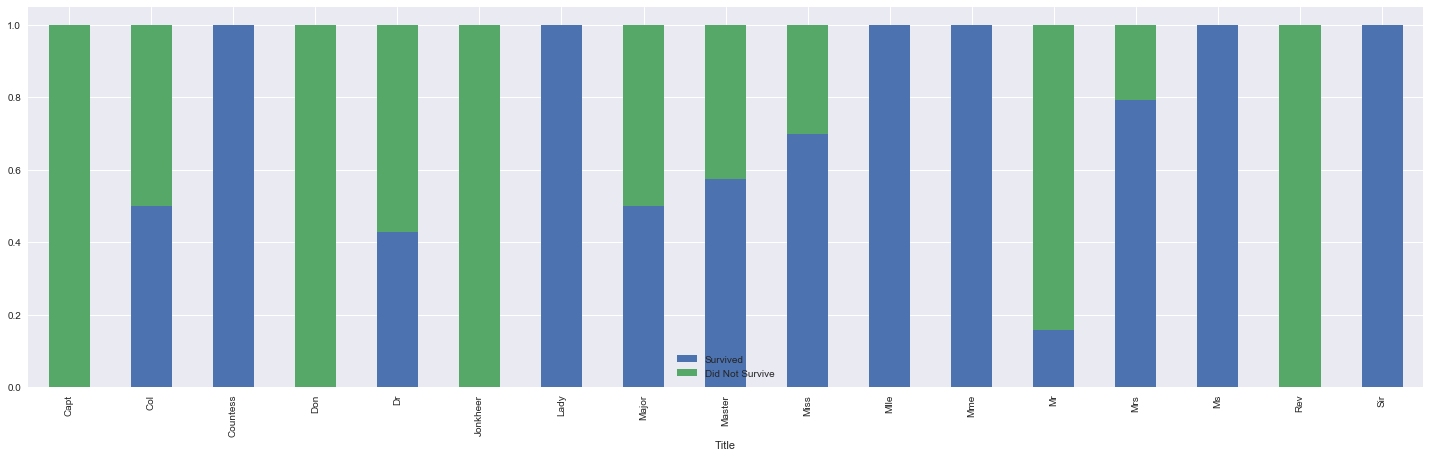

In [68]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.Title,hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Title').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

In [69]:
train_df.Title.value_counts().sort_values(ascending=False)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Don           1
Lady          1
Jonkheer      1
Countess      1
Mme           1
Ms            1
Capt          1
Name: Title, dtype: int64

In [70]:
ct6 = pd.crosstab(index=train_df.Title,columns=train_df.Survived,margins=True)
ct6

Survived,0,1,All
Title,,,
Capt,1,0,1
Col,1,1,2
Countess,0,1,1
Don,1,0,1
Dr,4,3,7
Jonkheer,1,0,1
Lady,0,1,1
Major,1,1,2
Master,17,23,40


In [71]:
## Did not Survive
print('Did not Survive:',(ct6[0] * 100/ct6[0:16][0].sum(axis=0)))

## Survive
print('Survived:',(ct6[1] * 100/ct6[0:16][1].sum(axis=0)))

Did not Survive: Title
Capt          0.182149
Col           0.182149
Countess      0.000000
Don           0.182149
Dr            0.728597
Jonkheer      0.182149
Lady          0.000000
Major         0.182149
Master        3.096539
Miss         10.018215
Mlle          0.000000
Mme           0.000000
Mr           79.417122
Mrs           4.735883
Ms            0.000000
Rev           1.092896
Sir           0.000000
All         100.000000
Name: 0, dtype: float64
Survived: Title
Capt          0.000000
Col           0.293255
Countess      0.293255
Don           0.000000
Dr            0.879765
Jonkheer      0.000000
Lady          0.293255
Major         0.293255
Master        6.744868
Miss         37.243402
Mlle          0.586510
Mme           0.293255
Mr           23.753666
Mrs          29.032258
Ms            0.293255
Rev           0.000000
Sir           0.293255
All         100.293255
Name: 1, dtype: float64


In [72]:
## Did not Survive
print('Did not Survive:',(ct6[0] * 100/ct6['All']))

## Survive
print('Survived:',(ct6[1] * 100/ct6['All']))

Did not Survive: Title
Capt        100.000000
Col          50.000000
Countess      0.000000
Don         100.000000
Dr           57.142857
Jonkheer    100.000000
Lady          0.000000
Major        50.000000
Master       42.500000
Miss         30.219780
Mlle          0.000000
Mme           0.000000
Mr           84.332689
Mrs          20.800000
Ms            0.000000
Rev         100.000000
Sir           0.000000
All          61.616162
dtype: float64
Survived: Title
Capt          0.000000
Col          50.000000
Countess    100.000000
Don           0.000000
Dr           42.857143
Jonkheer      0.000000
Lady        100.000000
Major        50.000000
Master       57.500000
Miss         69.780220
Mlle        100.000000
Mme         100.000000
Mr           15.667311
Mrs          79.200000
Ms          100.000000
Rev           0.000000
Sir         100.000000
All          38.383838
dtype: float64


#### Note:
1. It can be seen that Royal people were most likely to survive. Countess, Lady and Sir have survival rates of 100% each.
2. The survival rates of Master, Miss and Mlle is 57.5%,69.78% and 100%. This shows that children too were likely to survive.
3. The third category of people likely to survive were women. Mrs,Ms,Mme had survival rates of 79.2%,100% and 100% respectively
4. The Capt,Major,Rev and Drs were not likely to survive because of their nature to serve others.

In [73]:
title_map = {
    "Capt": "Service",
    "Col": "Service",
    "Major": "Service",
    "Dr": "Service",
    "Rev": "Service",
    "Jonkheer": "Royal",
    "Don": "Royal",
    "Sir" : "Royal",   
    "Countess":"Royal",
    "Dona":"Royal",
    "Lady" : "Royal",
    "Mrs" : "Mrs",
    "Ms": "Mrs",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Miss" : "Miss",
    "Mr" : "Mr",   
    "Master" : "Master"    
}

train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)  

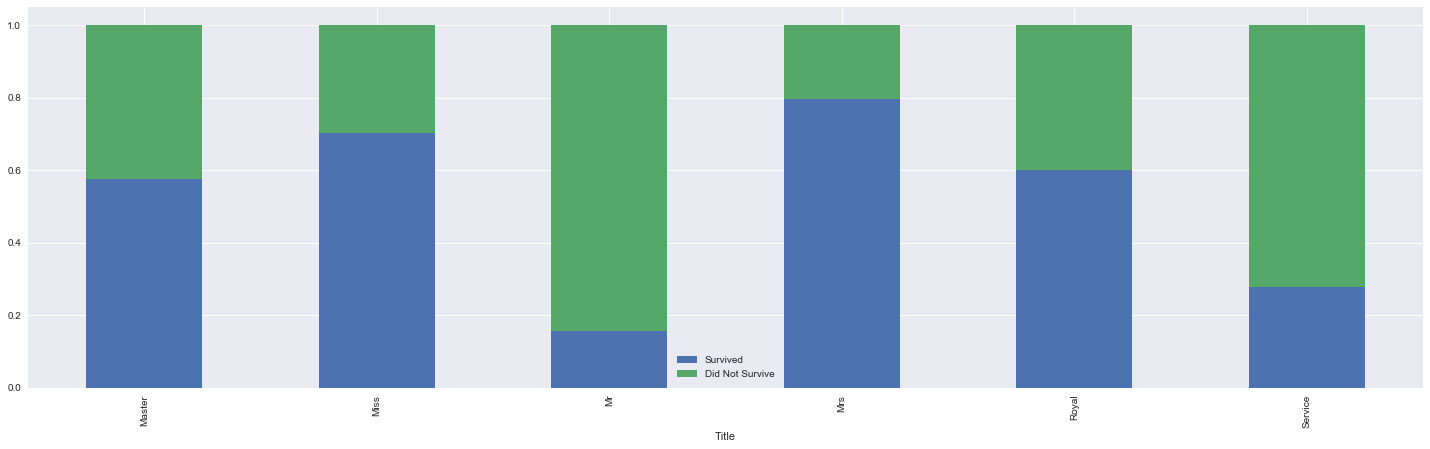

In [74]:
train_df.groupby('Title').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

#### Note:
1. This is in line with our previous observation. The survival rate for Royal, Mrs, Miss and Master was more compared to Mr and Service personnel

# Encoding

## Pclass

In [75]:
dummies = pd.get_dummies(train_df['Pclass'], prefix='PClass')
train_df = pd.concat([train_df, dummies], axis=1)


dummies = pd.get_dummies(test_df['Pclass'], prefix='PClass')
test_df = pd.concat([test_df, dummies], axis=1)


## Family Size

In [76]:
dummies = pd.get_dummies(train_df['FamilySize'], prefix='FamilySize')
train_df = pd.concat([train_df, dummies], axis=1)
train_df.drop('FamilySize', inplace=True, axis=1)

dummies = pd.get_dummies(test_df['FamilySize'], prefix='FamilySize')
test_df = pd.concat([test_df, dummies], axis=1)
test_df.drop('FamilySize', inplace=True, axis=1)

## Sib

In [77]:
dummies = pd.get_dummies(train_df['SibSp'], prefix='SibSp')
train_df = pd.concat([train_df, dummies], axis=1)
train_df.drop('SibSp', inplace=True, axis=1)

dummies = pd.get_dummies(test_df['SibSp'], prefix='SibSp')
test_df = pd.concat([test_df, dummies], axis=1)
test_df.drop('SibSp', inplace=True, axis=1)

## Parch

In [78]:
dummies = pd.get_dummies(train_df['Parch'], prefix='Parch')
train_df = pd.concat([train_df, dummies], axis=1)

dummies = pd.get_dummies(test_df['Parch'], prefix='Parch')
test_df = pd.concat([test_df, dummies], axis=1)

## Title

In [79]:
dummies = pd.get_dummies(train_df['Title'], prefix='Title')
train_df = pd.concat([train_df, dummies], axis=1)

dummies = pd.get_dummies(test_df['Title'], prefix='Title')
test_df = pd.concat([test_df, dummies], axis=1)

## Ticket

In [80]:
dummies = pd.get_dummies(train_df['Ticket'], prefix='Ticket')
train_df = pd.concat([train_df, dummies], axis=1)
train_df.drop('Ticket', inplace=True, axis=1)

dummies = pd.get_dummies(test_df['Ticket'], prefix='Ticket')
test_df = pd.concat([test_df, dummies], axis=1)
test_df.drop('Ticket', inplace=True, axis=1)

# Working on missing values

In [81]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Title,PClass_1,...,Ticket_SCParis,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_WC,Ticket_WEP
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,NaN,S,Mr,0,...,0,0,0,0,0,0,0,0,0,0


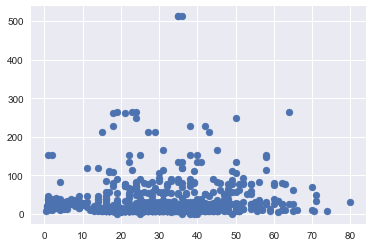

In [82]:
plt.scatter(x=train_df.Age,y=train_df.Fare)

In [83]:
train_df[(train_df['Embarked'] == 'S') & (train_df['Pclass'] == 3) & (train_df['Age'] > 60)]['Fare'].mean()

7.866666666666667

In [84]:
train_df[(train_df['Embarked'] == 'S') & (train_df['Pclass'] == 3) & (train_df['Age'] > 60)]['Fare'].median()

7.775

In [85]:
test_df.loc[test_df['Fare'].isnull(),'Fare'] = 7.87

In [86]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Title,PClass_1,...,Ticket_SCParis,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_WC,Ticket_WEP


# Standardization

## Fare

In [87]:
from sklearn.preprocessing import StandardScaler

stand_scale= StandardScaler()
train_df.loc[:, ['Fare']] = stand_scale.fit_transform(train_df.loc[:, ['Fare']])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Did Not Survive,...,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,-0.502445,S,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,0.786845,C,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,-0.488854,S,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,0.420730,S,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,-0.486337,S,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
stand_scale= StandardScaler()
test_df.loc[:, ['Fare']] = stand_scale.fit_transform(test_df.loc[:, ['Fare']])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Title,PClass_1,...,Ticket_SCParis,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_WC,Ticket_WEP
0,892,3,"Kelly, Mr. James",male,34.5,0,-0.497070,Q,Mr,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0,-0.511932,S,Mrs,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,-0.463761,Q,Mr,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,-0.482133,S,Mr,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,-0.417158,S,Mrs,0,...,0,0,0,0,0,0,0,0,0,0


## Embarked 

In [89]:
train_df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [90]:
np.sum(train_df.Embarked.value_counts(dropna=False))

891

In [91]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Did Not Survive,...,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0.962353,NaN,0,...,0,0,0,0,0,0,0,0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0.962353,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
train_df[train_df['Age'] > 61]['Embarked'].value_counts()

S    13
C     3
Q     2
Name: Embarked, dtype: int64

In [93]:
train_df[train_df['Age'] > 61]['Embarked'].value_counts()/train_df.Embarked.value_counts()

S    0.020186
C    0.017857
Q    0.025974
Name: Embarked, dtype: float64

In [94]:
train_df[(train_df['Age'] > 30) & (train_df['Age'] < 40)]['Embarked'].value_counts()


S    114
C     21
Q      6
Name: Embarked, dtype: int64

In [95]:
train_df[(train_df['Age'] > 30) & (train_df['Age'] < 40)]['Embarked'].value_counts()/train_df.Embarked.value_counts()


S    0.177019
C    0.125000
Q    0.077922
Name: Embarked, dtype: float64

In [96]:
#### Replacing with C since fares are higher here and these 2 passengers paid 80 which is on the higher side
train_df.Embarked.fillna('C',inplace=True)

In [97]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Did Not Survive,...,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP


### Encoding

In [98]:
embarked_dummies = pd.get_dummies(train_df['Embarked'], prefix='Embarked')
train_df = pd.concat([train_df, embarked_dummies], axis=1)

embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
test_df = pd.concat([test_df, embarked_dummies], axis=1)

## Age

### 1st Way - By Mean or Median

In [99]:
# shows no.of Nan values
train_df.Age.value_counts(dropna=False).head()

NaN      177
 24.0     30
 22.0     27
 18.0     26
 28.0     25
Name: Age, dtype: int64

### 177 missing age values. Lets fix them by filling them

In [100]:
train_df.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Service     18
Royal        5
Name: Title, dtype: int64

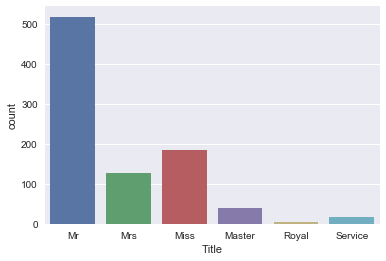

In [101]:
sns.countplot('Title',data=train_df)

In [102]:
# Mean
print('Mean')
print('Mr:',round(train_df[train_df['Title'] == 'Mr']['Age'].mean(),2))
print('Miss:',round(train_df[train_df['Title'] == 'Miss']['Age'].mean(),2))
print('Mrs:',round(train_df[train_df['Title'] == 'Mrs']['Age'].mean(),2))
print('Master:',round(train_df[train_df['Title'] == 'Master']['Age'].mean(),2))
print('Service:',round(train_df[train_df['Title'] == 'Service']['Age'].mean(),2))
print('Royal:',round(train_df[train_df['Title'] == 'Royal']['Age'].mean(),2))

Mean
Mr: 32.37
Miss: 21.8
Mrs: 35.72
Master: 4.57
Service: 46.71
Royal: 41.6


In [103]:
# Median
print('Median')
print('Mr:',round(train_df[train_df['Title'] == 'Mr']['Age'].median(),2))
print('Miss:',round(train_df[train_df['Title'] == 'Miss']['Age'].median(),2))
print('Mrs:',round(train_df[train_df['Title'] == 'Mrs']['Age'].median(),2))
print('Master:',round(train_df[train_df['Title'] == 'Master']['Age'].median(),2))
print('Service:',round(train_df[train_df['Title'] == 'Service']['Age'].median(),2))
print('Royal:',round(train_df[train_df['Title'] == 'Royal']['Age'].median(),2))

Median
Mr: 30.0
Miss: 21.0
Mrs: 35.0
Master: 3.5
Service: 50.0
Royal: 40.0


In [104]:
# Since the number of passengers having titles Mr,Mrs,Miss and Master is alot, mean would be a better representation
#Replacing with mean
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Mr')),'Age'] = 32.37
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Mrs')),'Age'] = 35.72
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Miss')),'Age'] = 21.88
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Master')),'Age'] = 3.5

#Replacing with mean
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Mr')),'Age'] = 32.37
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Mrs')),'Age'] = 35.72
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Miss')),'Age'] = 21.88
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Master')),'Age'] = 3.5

In [105]:
# Since the number of passengers having titles Service,Royal are few, median would be a better representation 
#as mean would give a skewed representation
#Replacing with median
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Service')),'Age'] = 50.0
train_df.loc[((train_df.Age.isnull()) & (train_df.Title == 'Royal')),'Age'] = 40.0

#Replacing with median
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Service')),'Age'] = 50.0
test_df.loc[((test_df.Age.isnull()) & (test_df.Title == 'Royal')),'Age'] = 40.0

In [106]:
train_df.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Service     18
Royal        5
Name: Title, dtype: int64

In [107]:
test_df.Title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Service      5
Royal        1
Name: Title, dtype: int64

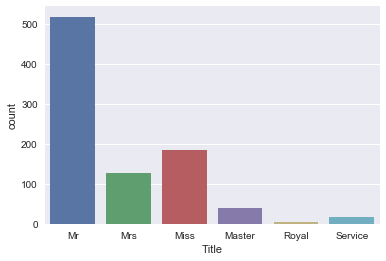

In [108]:
sns.countplot('Title',data=train_df)

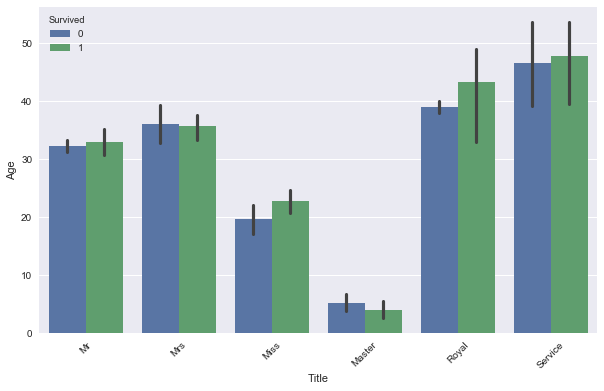

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(x='Title',y='Age',data=train_df,hue='Survived')
plt.xticks(rotation=45)
plt.show()

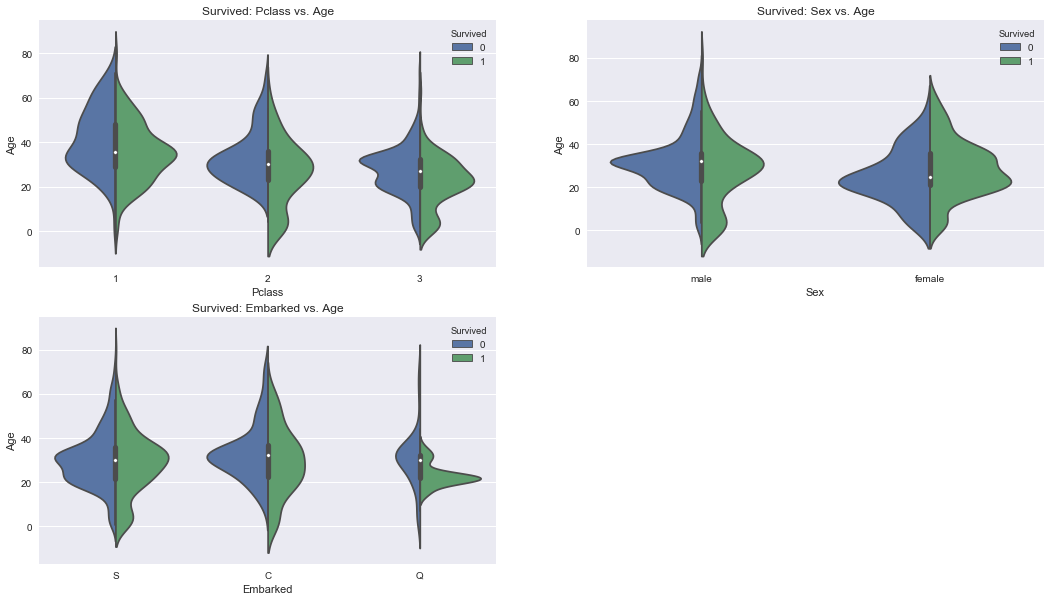

In [110]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train_df,split=True)
plt.title('Survived: Pclass vs. Age')
plt.subplot(2,2,2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train_df,split=True)
plt.title('Survived: Sex vs. Age')
plt.subplot(2,2,3)
sns.violinplot(x='Embarked',y='Age',hue='Survived',data=train_df,split=True)
plt.title('Survived: Embarked vs. Age')
plt.show()

### Note
1. Children were given preference irrespective of the Pclass.

2. Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.


### Standardization

In [111]:
stand_scale= StandardScaler()
train_df.loc[:, ['Age']] = stand_scale.fit_transform(train_df.loc[:, ['Age']])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Did Not Survive,...,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.584070,0,-0.502445,S,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.620205,0,0.786845,C,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.283001,0,-0.488854,S,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.394404,0,0.420730,S,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.394404,0,-0.486337,S,1,...,0,0,0,0,0,0,0,0,0,1


In [112]:
stand_scale= StandardScaler()
test_df.loc[:, ['Age']] = stand_scale.fit_transform(test_df.loc[:, ['Age']])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Parch,Fare,Embarked,Title,PClass_1,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_WC,Ticket_WEP,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,0.332665,0,-0.497070,Q,Mr,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.291831,0,-0.511932,S,Mrs,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,2.442831,0,-0.463761,Q,Mr,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,-0.242835,0,-0.482133,S,Mr,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.626502,1,-0.417158,S,Mrs,0,...,0,0,0,0,0,0,0,0,0,1


# Feature Engineering - 2

## Child

In [113]:
train_df['Child/Adult'] = 'Adult'
train_df.loc[(train_df.Age < 18),'Child/Adult'] = 'Child'

test_df['Child/Adult'] = 'Adult'
test_df.loc[(test_df.Age < 18),'Child/Adult'] = 'Child'

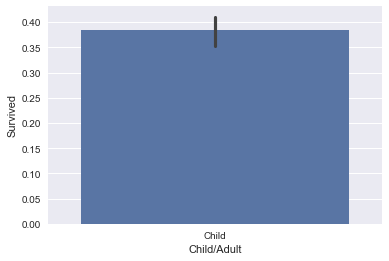

In [114]:
sns.barplot('Child/Adult','Survived',data=train_df)
plt.show()

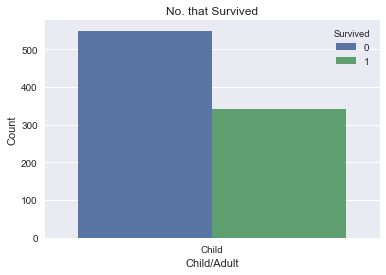

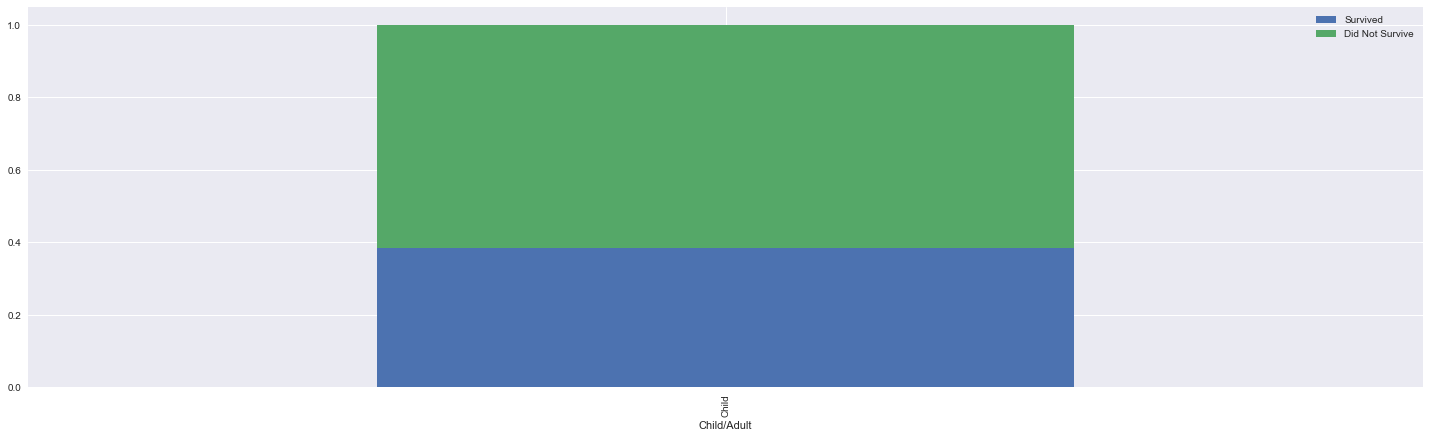

In [115]:
sns.countplot(train_df['Child/Adult'],hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Child/Adult').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

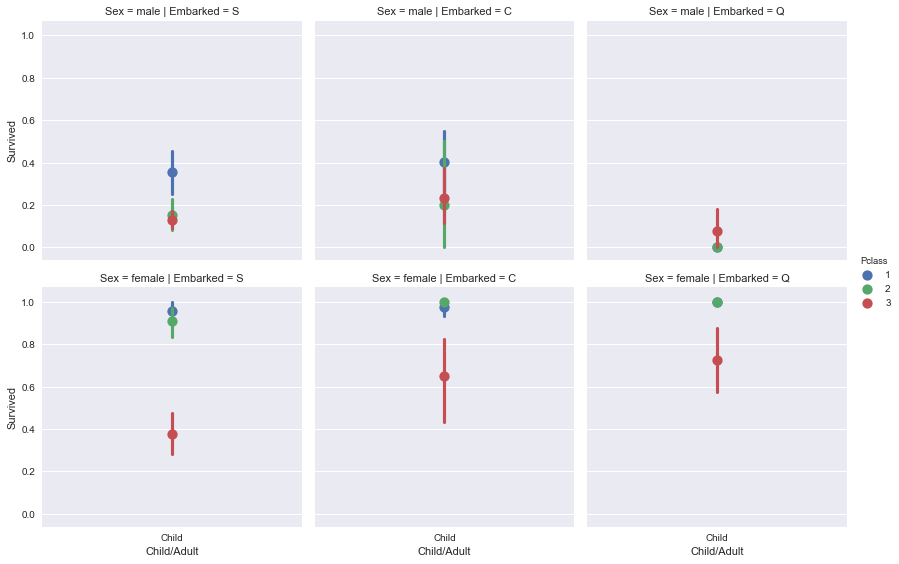

In [116]:
sns.factorplot(x='Child/Adult',y='Survived',hue='Pclass',col ='Embarked',row='Sex', data=train_df)
plt.show()

## Mother

In [117]:
train_df['Mother'] = 'Not Mother'
test_df['Mother'] = 'Not Mother'

In [119]:

train_df.loc[((((train_df.Sex == 'female') & (train_df.Parch > 0)) & (train_df.Age > 18)) & (train_df.Title != 'Miss')),'Mother'] = 'Mother'


test_df.loc[((test_df.Sex == 'female') & (test_df.Parch > 0) & (test_df.Age > 18) & (test_df.Title != 'Miss')),'Mother'] = 'Mother'

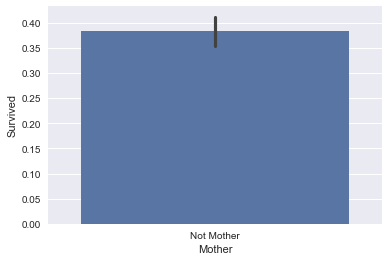

In [120]:
sns.barplot('Mother','Survived',data=train_df)
plt.show()

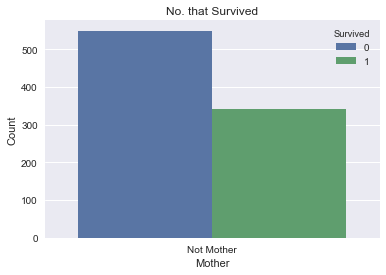

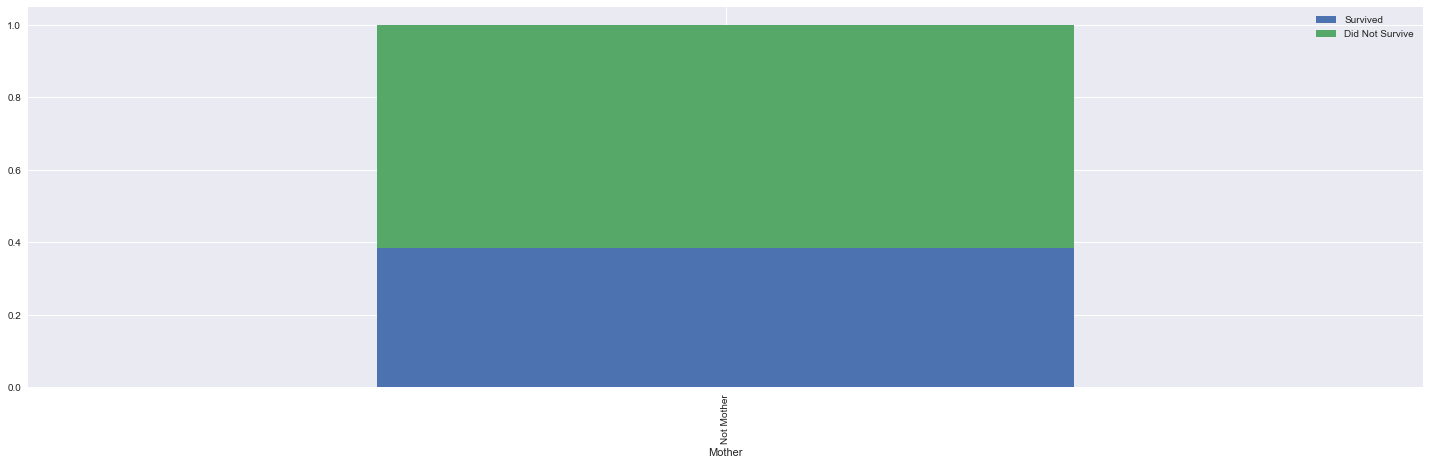

In [121]:
sns.countplot(train_df['Mother'],hue=train_df.Survived)
plt.title('No. that Survived')
plt.ylabel('Count')
plt.show()

train_df.groupby('Mother').agg('mean')[['Survived','Did Not Survive']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.show()

# Encoding

## Sex 


In [123]:

sex_map = {
    "male": 0,
    "female": 1
}

train_df.Sex = train_df.Sex.map(sex_map)
test_df.Sex = test_df.Sex.map(sex_map)

## Child/Adult

In [124]:
child_map = {
    "Adult": 0,
    "Child": 1
}

train_df['Child/Adult'] = train_df['Child/Adult'].map(child_map)
test_df['Child/Adult'] = test_df['Child/Adult'].map(child_map)

## Mother

In [125]:
mother_map = {
    "Not Mother": 0,
    "Mother": 1
}

train_df['Mother'] = train_df['Mother'].map(mother_map)
test_df['Mother'] = test_df['Mother'].map(mother_map)

In [126]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 78 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null int64
Age                891 non-null float64
Parch              891 non-null int64
Fare               891 non-null float64
Embarked           891 non-null object
Did Not Survive    891 non-null int64
Title              891 non-null object
PClass_1           891 non-null uint8
PClass_2           891 non-null uint8
PClass_3           891 non-null uint8
FamilySize_1       891 non-null uint8
FamilySize_2       891 non-null uint8
FamilySize_3       891 non-null uint8
FamilySize_4       891 non-null uint8
FamilySize_5       891 non-null uint8
FamilySize_6       891 non-null uint8
FamilySize_7       891 non-null uint8
FamilySize_8       891 non-null uint8
FamilySize_11      891 non-null uint8
SibSp_0       

## Saving Files

In [127]:
train_df.to_csv('train_data.csv')
test_df.to_csv('test_data.csv')